**NOTE**: This is a Julia demo for Binder, it's been adapted from the Julia demo on the nbconvert website.

Binder is an open-source project and Julia support is early in development. If you'd like to improve Julia support in Binder, see our issue on adding Julia support here: https://github.com/jupyter/repo2docker/issues/23. We'd love to hear from you!

# An IJulia Demo

This notebook uses **IJulia**: a [Julia-language](http://julialang.org/) backend combined with the [IPython](http://ipython.org/) interactive environment.   This combination allows you to interact with the Julia language using IPython's powerful [graphical notebook](http://ipython.org/notebook.html), which combines code, formatted text, math, and multimedia in a single document.

## Basic Julia interaction

Basic mathematical expressions work like you expect: 

In [1]:
1 + sin(3)-log(5)

-0.46831790437423315

You can define variables, write loops, and execute arbitrary multiline code blocks.  Here is an example of an alternating harmonic series $\sum_{n=1}^\infty \frac{(-1)^n}{n}$ from a [Julia tutorial by Homer Reid](http://homerreid.ath.cx/teaching/18.330/JuliaProgramming.shtml#SimplePrograms):

In [2]:
s = 0.0
for n = 1:2:10000
    s += 1/n - 1/(n+1)
end
s # an expression on the last line (if it doesn't end with ";") is printed as "Out"

0.6930971830599458

Previous outputs can be referred to via `Out[`*n*`]`, following the IPython, for example `Out[2]` for the result above.  You can also use the shorthand `_2`, or `_` for the previous result, as in IPython.  Like in Matlab, `ans` can also be used to refer to the previous result, *even if it was not printed* (when the command ended with `;`).

For example, the harmonic series above should be converging (slowly) to $\ln 2$, and we can check this:

In [3]:
Out[2]+1

1.6930971830599457

Like Matlab or Scipy + Numpy, Julia has lots of mathematical functions and linear algebra built in.  For example, we can define a $500\times500$ random matrix $R$ and form the positive-definite matrix $R^* R$:

In [4]:
R = rand(500,500)
R' * R

500×500 Array{Float64,2}:
 164.527  125.236  124.465  126.977  …  126.058  123.677  126.58   121.335
 125.236  167.011  123.084  124.161     125.285  127.609  119.962  128.549
 124.465  123.084  163.899  122.116     121.869  120.953  123.859  124.974
 126.977  124.161  122.116  163.18      124.839  123.186  124.172  124.02 
 118.748  117.499  120.431  116.337     118.515  120.35   119.397  117.844
 121.944  120.756  120.141  120.736  …  120.427  121.193  122.342  122.212
 131.06   135.641  132.43   127.917     129.327  130.057  129.365  131.856
 127.721  130.072  124.274  127.359     129.156  124.383  125.921  124.834
 127.705  124.427  129.186  128.128     126.828  126.641  124.761  125.68 
 125.139  128.131  127.96   123.596     129.648  124.699  123.269  127.82 
 129.157  128.37   125.889  128.207  …  127.49   124.336  129.751  125.806
 124.934  124.764  124.254  123.529     125.832  121.389  126.695  120.753
 121.568  124.099  124.272  119.218     119.074  118.434  117.023  119.155

(Notice that, by default, only a portion of a large matrix is shown.  You didn't really want to read $500^2 = 250,000$ numbers, did you?)

Standard output from Julia is also captured and sent to the IJulia notebook as you'd expect:

In [5]:
println("Hello world!\n")
println(stderr, "Börk börk börk, some unicode output on stderr...\n")

Hello world!



Börk börk börk, some unicode output on stderr...



IJulia even captures output from external C libraries (and notice how easy it is using Julia's `ccall` intrinsic):

In [6]:
ccall(:printf, Cint, (Ptr{UInt8},), "Hello from C!!\n");

Hello from C!!


We can define functions, of course, and use them in later input cells:

In [7]:
f(x) = x .+ 1

f (generic function with 1 method)

In [8]:
println(f(3))
f([1,1,2,3,5,8])

4


6-element Array{Int64,1}:
 2
 2
 3
 4
 6
 9

Notice that the input above both printed an scalar to `STDOUT` and also returned a vector, the latter using Julia's ability to write polymorphic functions and built-in array operations.

On the other hand adding a string to a number is not defined (there is no `+` method defined for those types, although we could easily add one), and attempting to do so will throw an exception:

In [9]:
f("Hello?")

MethodError: MethodError: no method matching +(::String, ::Int64)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529
  +(!Matched::Complex{Bool}, ::Real) at complex.jl:297
  +(!Matched::Missing, ::Number) at missing.jl:115
  ...

# Interactive Plotting in IJulia

Below we'll show off some plotting using the excellent Gadfly package. The plots are heavily inspired by [this blog post](http://int8.io/basic-visualization-in-julia-gadfly/).

In [10]:
using RDatasets
sleep = dataset("lme4","sleepstudy")

┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1273


,Reaction,Days,Subject
,Float64,Int32,Categorical…
1,249.56,0,308
2,258.705,1,308
3,250.801,2,308
4,321.44,3,308
5,356.852,4,308
6,414.69,5,308
7,382.204,6,308
8,290.149,7,308
9,430.585,8,308


┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1273
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = evalmapping at dataframes.jl:96 [inlined]
└ @ Core /home/vagrant/.julia/packages/Gadfly/1wgcD/src/dataframes.jl:96


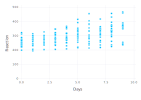

In [11]:
using Gadfly
plot(sleep, x = "Days", y = "Reaction", Geom.point)

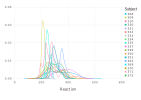

In [12]:
plot(sleep, x = "Reaction", Geom.density, color = "Subject", Scale.x_continuous(minvalue= 0, maxvalue= 500))

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[13]:1
└ @ Core In[13]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[13]:1
└ @ Core In[13]:1


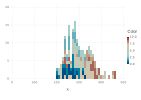

In [13]:
plot(x = sleep[:Reaction], Geom.histogram(bincount = 30), Scale.x_continuous(minvalue = 200), color = sleep[:Days])

## Multimedia display in IJulia

Like most programming languages, Julia has a built-in `print(x)` function for outputting an object `x` as text, and you can override the resulting text representation of a user-defined type by overloading Julia's `show` function.  The next version of Julia, however, will extend this to a more general mechanism to display **arbitrary multimedia representations** of objects, as defined by standard [MIME types](https://en.wikipedia.org/wiki/Internet_media_type).   More specifically, the Julia [multimedia I/O API](http://docs.julialang.org/en/latest/stdlib/base/#multimedia-i-o) provides:

* A `display(x)` function requests the richest available multimedia display of a Julia object x (with a `text/plain` fallback).
* Overloading `writemime` allows one to indicate arbitrary multimedia representations (keyed by standard MIME types) of user-defined types.
* Multimedia-capable display backends may be registered by subclassing a generic `Display` type.  IJulia provides one such backend which, thanks to the IPython notebook, is capable of displaying HTML, LaTeX, SVG, PNG, and JPEG media formats.

The last two points are critical, because they separate **multimedia export** (which is defined by functions associated with the originating Julia data) from **multimedia display** (defined by backends which know nothing about the source of the data).

Precisely these mechanism were used to create the inline PyPlot plots above.   To start with, the simplest thing is to provide the MIME type of the data when you call `display`, which allows you to pass "raw" data in the corresponding format:

In [14]:
display("text/html", """Hello <b>world</b> in <font color="red">HTML</font>!""")

Hello world in HTML !

However, it will be more common to attach this information to types, so that they display correctly automatically.  For example, let's define a simple `HTML` type in Julia that contains a string and automatically displays as HTML (given an HTML-capable backend such as IJulia):

In [15]:
mutable struct HTML
   s::String
end

Base.show(io::IO, ::MIME"text/html", x::HTML) = print(io, x.s)

Here, `Base.show` is just a function that writes `x` in the corresponding format (`text/html`) to the I/O stream `io`.

This `show` definition is all that we need to make any object of type `HTML` display automatically as HTML text in IJulia:

In [16]:
x = HTML("<ul> <li> Hello from a bulleted list! </ul>")

HTML("<ul> <li> Hello from a bulleted list! </ul>")

In [17]:
display(x)
println(x)

HTML("<ul> <li> Hello from a bulleted list! </ul>")

HTML("<ul> <li> Hello from a bulleted list! </ul>")
